<font color=red size=5 >Group members: Lunjing Yuan, Zihao Li, Haorui Cheng, Mengyao Song.</font>


# HW 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. 

Before we begin with the exercises, we need to import all libraries required for this exercise. We will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

import pandas as pd

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Debugging

Here are some things to keep in mind throughout this exercise:

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy`. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

## 1 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

I provide you with the code needed to load this data. 

In [2]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() 

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 1.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. There are many plotting libraries in python (see this [blog post](https://blog.modeanalytics.com/python-data-visualization-libraries/) for a good summary of the most popular ones). 

`matplotlib` is one of the most popular scientific plotting libraries in python and has extensive tools and functions to make beautiful plots. `pyplot` is a module within `matplotlib` which provides a simplified interface to `matplotlib`'s most common plotting tasks.

In the following part, your first job is to complete the plotting of the data using a scatter plot. 

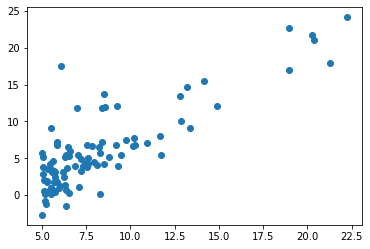

In [4]:
plt.scatter(data['Population'], data['Profit'])

<a id="section2"></a>
### 1.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 1.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

Note that $\alpha$ is the learning rate. With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

#### 1.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. 

In [5]:
data.insert(0, 'Ones', 1)

In [6]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
# Convert X (training data) and y (target variable) to numpy matrix and initiate theta. 
# Do NOT execute this cell more than once.
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [10]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

<a id="section2"></a>
#### 1.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [11]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    """ 
    # ====================== YOUR CODE HERE =====================
    m = int(X.shape[0])
    res = np.power(((X.dot(theta.T)) - y), 2) 
    return np.sum(res) / (2 * m)
    # ===========================================================
    

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [12]:
J = computeCost(X, y, theta=np.array([[0.0, 0.0]]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([[-1, 2]]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


<a id="section3"></a>
#### 1.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. [Refer to the equations in this notebook](#section2) if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------   
    alpha : float
        The learning rate.
    
    iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    cost : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters) # Use a python list to save cost in every iteration
    for i in range(iters):
        # ==================== YOUR CODE HERE =================================
        error = (X * theta.T) - y
        # print(error)
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        # =====================================================================
                   
    return theta, cost 

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [14]:
# some gradient descent settings
iterations = 1000
alpha = 0.01

theta, cost = gradientDescent(X, y, theta, alpha, iterations)

[[-17.592  ]
 [ -9.1302 ]
 [-13.662  ]
 [-11.854  ]
 [ -6.8233 ]
 [-11.886  ]
 [ -4.3483 ]
 [-12.     ]
 [ -6.5987 ]
 [ -3.8166 ]
 [ -3.2522 ]
 [-15.505  ]
 [ -3.1551 ]
 [ -7.2258 ]
 [ -0.71618]
 [ -3.5129 ]
 [ -5.3048 ]
 [ -0.56077]
 [ -3.6518 ]
 [ -5.3893 ]
 [ -3.1386 ]
 [-21.767  ]
 [ -4.263  ]
 [ -5.1875 ]
 [ -3.0825 ]
 [-22.638  ]
 [-13.501  ]
 [ -7.0467 ]
 [-14.692  ]
 [-24.147  ]
 [  1.22   ]
 [ -5.9966 ]
 [-12.134  ]
 [ -1.8495 ]
 [ -6.5426 ]
 [ -4.5623 ]
 [ -4.1164 ]
 [ -3.3928 ]
 [-10.117  ]
 [ -5.4974 ]
 [ -0.55657]
 [ -3.9115 ]
 [ -5.3854 ]
 [ -2.4406 ]
 [ -6.7318 ]
 [ -1.0463 ]
 [ -5.1337 ]
 [ -1.844  ]
 [ -8.0043 ]
 [ -1.0179 ]
 [ -6.7504 ]
 [ -1.8396 ]
 [ -4.2885 ]
 [ -4.9981 ]
 [ -1.4233 ]
 [  1.4211 ]
 [ -2.4756 ]
 [ -4.6042 ]
 [ -3.9624 ]
 [ -5.4141 ]
 [ -5.1694 ]
 [  0.74279]
 [-17.929  ]
 [-12.054  ]
 [-17.054  ]
 [ -4.8852 ]
 [ -5.7442 ]
 [ -7.7754 ]
 [ -1.0173 ]
 [-20.992  ]
 [ -6.6799 ]
 [ -4.0259 ]
 [ -1.2784 ]
 [ -3.3411 ]
 [  2.6807 ]
 [ -0.29678]
 [ -3.8845 ]

 [ 3.31801195e+00]]
[[-1.30562110e+01]
 [-5.11620968e+00]
 [-6.96832643e+00]
 [-6.51804217e+00]
 [-2.51176620e+00]
 [-5.31390623e+00]
 [ 1.41161922e+00]
 [-5.25301768e+00]
 [-1.72594597e+00]
 [-2.26481471e-01]
 [ 9.25748338e-01]
 [-3.75335599e+00]
 [ 1.04372387e+00]
 [-6.30859623e-01]
 [ 3.39905216e+00]
 [ 3.68221611e-01]
 [-5.40276176e-01]
 [ 3.09699241e+00]
 [ 1.17024352e+00]
 [ 7.22374415e-03]
 [ 1.46796864e+00]
 [-4.54471308e+00]
 [-2.82697228e-01]
 [-4.58186832e-01]
 [ 9.64819492e-01]
 [-6.60284080e+00]
 [-2.94633911e+00]
 [ 1.83164695e+00]
 [-3.82555010e+00]
 [-5.19285053e+00]
 [ 4.98733654e+00]
 [-1.03138440e+00]
 [-4.78664463e+00]
 [ 2.49070406e+00]
 [-1.24429660e-01]
 [ 1.60706629e+00]
 [ 2.19855742e+00]
 [ 6.91611633e-01]
 [ 4.44828449e-01]
 [-7.43627521e-01]
 [ 3.34919011e+00]
 [ 1.31631722e+00]
 [ 4.16580198e+00]
 [ 1.79379290e+00]
 [-6.59822981e-01]
 [ 4.37020333e+00]
 [-1.52960472e+00]
 [ 2.41521059e+00]
 [ 1.53973442e+00]
 [ 3.00854396e+00]
 [-9.33319462e-01]
 [ 1.977282

 [  3.27740162]]
[[-13.09070695]
 [ -5.15593198]
 [ -6.9812087 ]
 [ -6.54452348]
 [ -2.54850827]
 [ -5.32800626]
 [  1.38938435]
 [ -5.265366  ]
 [ -1.75706679]
 [ -0.27044932]
 [  0.88766826]
 [ -3.71557702]
 [  1.00585288]
 [ -0.64473082]
 [  3.36034391]
 [  0.32716848]
 [ -0.57248104]
 [  3.05370209]
 [  1.13861478]
 [ -0.01865094]
 [  1.43418168]
 [ -4.45213948]
 [ -0.32275695]
 [ -0.49074437]
 [  0.92543102]
 [ -6.52215762]
 [ -2.92054927]
 [  1.84064663]
 [ -3.79663734]
 [ -5.08293039]
 [  4.94514372]
 [ -1.06157911]
 [ -4.79297955]
 [  2.45424915]
 [ -0.1400714 ]
 [  1.58893249]
 [  2.18188189]
 [  0.65259468]
 [  0.47069009]
 [ -0.77594008]
 [  3.30838376]
 [  1.28875275]
 [  4.18154106]
 [  1.75627818]
 [ -0.67893224]
 [  4.34452877]
 [ -1.57343258]
 [  2.37794444]
 [  1.55540171]
 [  2.9689464 ]
 [ -0.95498179]
 [  1.93558576]
 [  1.40167609]
 [  0.85423763]
 [  3.27951859]
 [  6.14753698]
 [  2.17419031]
 [ -0.52858101]
 [  3.43472545]
 [  2.11279089]
 [  1.78902055]
 [  4.4

[[-13.32855769]
 [ -5.42981895]
 [ -7.07003251]
 [ -6.72711329]
 [ -2.80184642]
 [ -5.42522656]
 [  1.23607399]
 [ -5.35050822]
 [ -1.97164618]
 [ -0.57360956]
 [  0.62510449]
 [ -3.45508938]
 [  0.7447308 ]
 [ -0.74037329]
 [  3.09344885]
 [  0.04410538]
 [ -0.79453499]
 [  2.75521345]
 [  0.92053324]
 [ -0.19705796]
 [  1.2012191 ]
 [ -3.81384058]
 [ -0.59897044]
 [ -0.71523002]
 [  0.65384581]
 [ -5.96584364]
 [ -2.74272718]
 [  1.90269983]
 [ -3.5972826 ]
 [ -4.32502631]
 [  4.65422245]
 [ -1.26977296]
 [ -4.83665905]
 [  2.20289102]
 [ -0.2479219 ]
 [  1.4638992 ]
 [  2.06690334]
 [  0.38357111]
 [  0.64900718]
 [ -0.99873652]
 [  3.02702224]
 [  1.09869458]
 [  4.29006269]
 [  1.49761256]
 [ -0.81069139]
 [  4.16750156]
 [ -1.87562756]
 [  2.12099277]
 [  1.66342833]
 [  2.69591949]
 [ -1.1043445 ]
 [  1.6480862 ]
 [  1.24511727]
 [  0.70876689]
 [  3.05544751]
 [  5.92508085]
 [  1.94649333]
 [ -0.79553794]
 [  3.39488222]
 [  2.08182059]
 [  1.71918012]
 [  4.10633975]
 [  0.99

 [ 2.96110631e+00]]
[[-1.33593797e+01]
 [-5.46531080e+00]
 [-7.08154281e+00]
 [-6.75077432e+00]
 [-2.83467542e+00]
 [-5.43782492e+00]
 [ 1.21620716e+00]
 [-5.36154144e+00]
 [-1.99945260e+00]
 [-6.12894793e-01]
 [ 5.91079970e-01]
 [-3.42133390e+00]
 [ 7.10893111e-01]
 [-7.52767193e-01]
 [ 3.05886306e+00]
 [ 7.42444639e-03]
 [-8.23310006e-01]
 [ 2.71653358e+00]
 [ 8.92272984e-01]
 [-2.20176966e-01]
 [ 1.17103047e+00]
 [-3.73112616e+00]
 [-6.34763762e-01]
 [-7.44320154e-01]
 [ 6.18652245e-01]
 [-5.89375329e+00]
 [-2.71968397e+00]
 [ 1.91074104e+00]
 [-3.57144907e+00]
 [-4.22681277e+00]
 [ 4.61652320e+00]
 [-1.29675191e+00]
 [-4.84231930e+00]
 [ 2.17031859e+00]
 [-2.61897784e-01]
 [ 1.44769667e+00]
 [ 2.05200377e+00]
 [ 3.48709500e-01]
 [ 6.72114530e-01]
 [-1.02760776e+00]
 [ 2.99056180e+00]
 [ 1.07406576e+00]
 [ 4.30412555e+00]
 [ 1.46409318e+00]
 [-8.27765499e-01]
 [ 4.14456136e+00]
 [-1.91478771e+00]
 [ 2.08769550e+00]
 [ 1.67742704e+00]
 [ 2.66053910e+00]
 [-1.12369978e+00]
 [ 1.610830

 [  2.71482386]]
[[-13.56858106]
 [ -5.70620774]
 [ -7.15966768]
 [ -6.91137096]
 [ -3.05749868]
 [ -5.52333492]
 [  1.08136322]
 [ -5.43642817]
 [ -2.18818564]
 [ -0.879539  ]
 [  0.36014233]
 [ -3.19222232]
 [  0.48122351]
 [ -0.83688941]
 [  2.82411585]
 [ -0.24154335]
 [ -1.01861727]
 [  2.45399827]
 [  0.70045964]
 [ -0.37709464]
 [  0.96612853]
 [ -3.16971115]
 [ -0.87770699]
 [ -0.94176622]
 [  0.37977981]
 [ -5.40444802]
 [ -2.56328077]
 [  1.96531985]
 [ -3.39610687]
 [ -3.56019918]
 [  4.36064376]
 [ -1.47986855]
 [ -4.88073755]
 [  1.94923685]
 [ -0.35675755]
 [  1.33772379]
 [  1.95087453]
 [  0.11209016]
 [  0.82895311]
 [ -1.2235681 ]
 [  2.74309062]
 [  0.90690034]
 [  4.39957561]
 [  1.23658416]
 [ -0.9436541 ]
 [  3.9888573 ]
 [ -2.18058293]
 [  1.86169398]
 [  1.77244173]
 [  2.42039863]
 [ -1.25507156]
 [  1.35796048]
 [  1.08712836]
 [  0.56196734]
 [  2.82932965]
 [  5.7005927 ]
 [  1.71671646]
 [ -1.06493338]
 [  3.35467504]
 [  2.05056739]
 [  1.64870173]
 [  3.8

 [  2.68726427]]
[[-13.59199119]
 [ -5.73316468]
 [ -7.16841003]
 [ -6.9293421 ]
 [ -3.08243313]
 [ -5.53290369]
 [  1.06627387]
 [ -5.44480817]
 [ -2.20930531]
 [ -0.90937711]
 [  0.33429986]
 [ -3.16658419]
 [  0.45552294]
 [ -0.84630289]
 [  2.79784709]
 [ -0.26940343]
 [ -1.04047262]
 [  2.42461995]
 [  0.67899527]
 [ -0.3946541 ]
 [  0.94319952]
 [ -3.10688749]
 [ -0.90489291]
 [ -0.96386091]
 [  0.35304942]
 [ -5.3496936 ]
 [ -2.54577889]
 [  1.97142735]
 [ -3.37648566]
 [ -3.48560355]
 [  4.33201025]
 [ -1.50035974]
 [ -4.88503664]
 [  1.92449729]
 [ -0.36737258]
 [  1.32541756]
 [  1.93955793]
 [  0.08561189]
 [  0.84650372]
 [ -1.24549652]
 [  2.71539802]
 [  0.88819413]
 [  4.4102567 ]
 [  1.21112536]
 [ -0.95662231]
 [  3.97143365]
 [ -2.21032604]
 [  1.83640387]
 [  1.7830741 ]
 [  2.39352634]
 [ -1.26977237]
 [  1.32966374]
 [  1.07171928]
 [  0.54764959]
 [  2.80727577]
 [  5.67869777]
 [  1.69430571]
 [ -1.09120824]
 [  3.35075353]
 [  2.04751919]
 [  1.64182779]
 [  3.7

 [  2.52496554]]
[[-13.72985366]
 [ -5.89191439]
 [ -7.21989388]
 [ -7.03517436]
 [ -3.22927238]
 [ -5.58925428]
 [  0.97741248]
 [ -5.4941581 ]
 [ -2.33367931]
 [ -1.08509412]
 [  0.18211328]
 [ -3.01560097]
 [  0.30417199]
 [ -0.90173895]
 [  2.64315001]
 [ -0.43347179]
 [ -1.16917899]
 [  2.25161068]
 [  0.55259137]
 [ -0.49806196]
 [  0.80817031]
 [ -2.73691821]
 [ -1.06499112]
 [ -1.09397674]
 [  0.19563385]
 [ -5.02724422]
 [ -2.44271007]
 [  2.00739447]
 [ -3.26093614]
 [ -3.04630901]
 [  4.16338715]
 [ -1.62103256]
 [ -4.91035406]
 [  1.77880568]
 [ -0.42988463]
 [  1.25294606]
 [  1.87291434]
 [ -0.0703189 ]
 [  0.94985944]
 [ -1.37463327]
 [  2.55231592]
 [  0.77803307]
 [  4.47315775]
 [  1.06119821]
 [ -1.03299223]
 [  3.86882557]
 [ -2.38548357]
 [  1.68747016]
 [  1.84568823]
 [  2.23527514]
 [ -1.35634563]
 [  1.16302393]
 [  0.98097504]
 [  0.46333219]
 [  2.67740023]
 [  5.54975828]
 [  1.56232853]
 [ -1.24594118]
 [  3.32765969]
 [  2.02956826]
 [  1.60134705]
 [  3.6

 [  2.5083101 ]]
[[-13.7440014 ]
 [ -5.90820562]
 [ -7.22517726]
 [ -7.04603509]
 [ -3.24434133]
 [ -5.5950371 ]
 [  0.96829334]
 [ -5.4992225 ]
 [ -2.34644283]
 [ -1.10312657]
 [  0.16649557]
 [ -3.00010675]
 [  0.28864004]
 [ -0.90742792]
 [  2.62727468]
 [ -0.45030883]
 [ -1.18238711]
 [  2.23385611]
 [  0.53961953]
 [ -0.50867389]
 [  0.79431333]
 [ -2.69895118]
 [ -1.08142073]
 [ -1.1073295 ]
 [  0.17947954]
 [ -4.99415379]
 [ -2.43213293]
 [  2.01108549]
 [ -3.24907821]
 [ -3.00122767]
 [  4.1460827 ]
 [ -1.63341626]
 [ -4.91295218]
 [  1.76385451]
 [ -0.43629975]
 [  1.24550888]
 [  1.86607524]
 [ -0.08632085]
 [  0.96046603]
 [ -1.38788555]
 [  2.53558009]
 [  0.76672811]
 [  4.47961278]
 [  1.04581237]
 [ -1.04082948]
 [  3.85829571]
 [ -2.4034586 ]
 [  1.67218627]
 [  1.85211383]
 [  2.21903507]
 [ -1.36522996]
 [  1.145923  ]
 [  0.97166267]
 [  0.45467936]
 [  2.66407213]
 [  5.53652623]
 [  1.54878475]
 [ -1.26182019]
 [  3.32528975]
 [  2.02772609]
 [  1.59719283]
 [  3.5

[[-13.84981909]
 [ -6.03005552]
 [ -7.26469418]
 [ -7.12726768]
 [ -3.35704923]
 [ -5.63828955]
 [  0.90008692]
 [ -5.53710152]
 [ -2.4419073 ]
 [ -1.23799988]
 [  0.04968327]
 [ -2.88421811]
 [  0.17246913]
 [ -0.94997841]
 [  2.50853543]
 [ -0.5762411 ]
 [ -1.28117695]
 [  2.10106115]
 [  0.44259699]
 [ -0.5880456 ]
 [  0.69067033]
 [ -2.41497764]
 [ -1.20430567]
 [ -1.20720118]
 [  0.05865368]
 [ -4.74665462]
 [ -2.35302146]
 [  2.03869241]
 [ -3.16038705]
 [ -2.66404285]
 [  4.01665439]
 [ -1.72603986]
 [ -4.93238481]
 [  1.65202749]
 [ -0.48428148]
 [  1.18988267]
 [  1.8149223 ]
 [ -0.20600706]
 [  1.03979772]
 [ -1.48700572]
 [  2.41040484]
 [  0.68217291]
 [  4.5278931 ]
 [  0.93073432]
 [ -1.09944796]
 [  3.77953787]
 [ -2.53790247]
 [  1.55787074]
 [  1.90017392]
 [  2.09756781]
 [ -1.43168011]
 [  1.01801699]
 [  0.90201104]
 [  0.38996071]
 [  2.56438489]
 [  5.43755747]
 [  1.44748438]
 [ -1.38058697]
 [  3.30756385]
 [  2.01394768]
 [  1.56612144]
 [  3.45885912]
 [  2.53

 [  2.37206501]]
[[-13.85973296]
 [ -6.04147142]
 [ -7.26839645]
 [ -7.13487822]
 [ -3.36760864]
 [ -5.6423418 ]
 [  0.89369678]
 [ -5.54065034]
 [ -2.4508512 ]
 [ -1.25063592]
 [  0.03873933]
 [ -2.8733607 ]
 [  0.16158528]
 [ -0.95396489]
 [  2.49741095]
 [ -0.58803947]
 [ -1.2904324 ]
 [  2.08861982]
 [  0.43350711]
 [ -0.59548179]
 [  0.6809602 ]
 [ -2.38837266]
 [ -1.21581855]
 [ -1.21655798]
 [  0.04733372]
 [ -4.72346685]
 [ -2.34560964]
 [  2.04127886]
 [ -3.15207773]
 [ -2.6324526 ]
 [  4.00452848]
 [ -1.7347176 ]
 [ -4.93420542]
 [  1.64155062]
 [ -0.48877681]
 [  1.18467115]
 [  1.81012987]
 [ -0.21722025]
 [  1.04723017]
 [ -1.49629212]
 [  2.39867739]
 [  0.67425108]
 [  4.5324164 ]
 [  0.91995286]
 [ -1.10493982]
 [  3.77215919]
 [ -2.55049828]
 [  1.54716072]
 [  1.90467658]
 [  2.08618776]
 [ -1.43790571]
 [  1.00603369]
 [  0.8954855 ]
 [  0.38389733]
 [  2.55504536]
 [  5.42828526]
 [  1.43799372]
 [ -1.39171402]
 [  3.30590314]
 [  2.01265681]
 [  1.56321041]
 [  3.4

 [  2.27648618]]
[[-1.39409211e+01]
 [-6.13496021e+00]
 [-7.29871564e+00]
 [-7.19720357e+00]
 [-3.45408328e+00]
 [-5.67552705e+00]
 [ 8.41365699e-01]
 [-5.56971285e+00]
 [-2.52409590e+00]
 [-1.35411687e+00]
 [-5.08843963e-02]
 [-2.78444565e+00]
 [ 7.24536721e-02]
 [-9.86611569e-01]
 [ 2.40630879e+00]
 [-6.84660449e-01]
 [-1.36622846e+00]
 [ 1.98673348e+00]
 [ 3.59066990e-01]
 [-6.56379388e-01]
 [ 6.01440577e-01]
 [-2.17049522e+00]
 [-1.31010147e+00]
 [-1.29318409e+00]
 [-4.53693902e-02]
 [-4.53357421e+00]
 [-2.28491171e+00]
 [ 2.06246014e+00]
 [-3.08402983e+00]
 [-2.37374903e+00]
 [ 3.90522519e+00]
 [-1.80578265e+00]
 [-4.94911501e+00]
 [ 1.55575183e+00]
 [-5.25590577e-01]
 [ 1.14199219e+00]
 [ 1.77088301e+00]
 [-3.09048960e-01]
 [ 1.10809707e+00]
 [-1.57234163e+00]
 [ 2.30263723e+00]
 [ 6.09376481e-01]
 [ 4.56945925e+00]
 [ 8.31659737e-01]
 [-1.14991459e+00]
 [ 3.71173258e+00]
 [-2.65364975e+00]
 [ 1.45945263e+00]
 [ 1.94155048e+00]
 [ 1.99299254e+00]
 [-1.48888929e+00]
 [ 9.07898371e

In [ ]:
computeCost(X, y, theta)

In [ ]:
print('Expected theta values (approximately): [[-3.24140214,  1.1272942 ]]')

### Use your final parameters to plot the linear fit. 

In [ ]:
import matplotlib.pyplot as plt

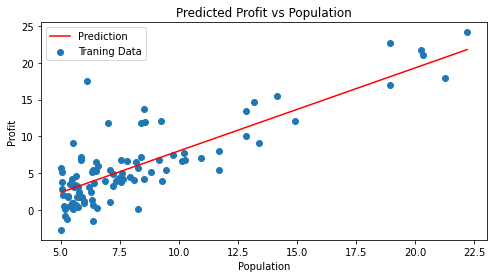

In [18]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = theta[0,0]+(theta[0,1]*x)

fig,ax = plt.subplots(figsize = (8,4))
ax.plot(x,f,'r',label = 'Prediction')
ax.scatter(data.Population,data.Profit,label = 'Traning Data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population')
plt.show()

### Plot Error vs. Training Epoch (Iterations) below: 

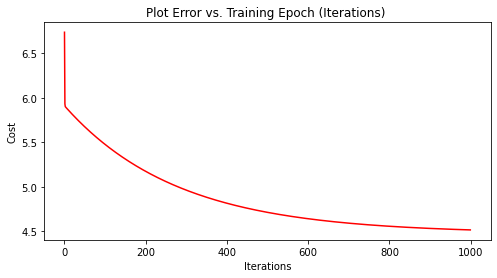

In [19]:
fig,ax = plt.subplots(figsize = (8,4))
ax.plot(np.arange(iterations),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Plot Error vs. Training Epoch (Iterations) ')
plt.show()

## 2 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 2.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [20]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean). In `numpy`, you can use the `std` function to compute the standard deviation. 

At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [28]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X_norm, axis=0)
    sigma = np.std(X_norm, axis=0)  
    X_norm = (X_norm-mu)/sigma
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [31]:
# call featureNormalize on the loaded data
data2_norm, mu, sigma = featureNormalize(data2)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64
Computed standard deviation: Size           786.202619
Bedrooms         0.752843
Price       123702.536006
dtype: float64


In [32]:
data2_norm.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


After the `featureNormalize` function is tested, we now add the intercept term to `data2_norm`:

In [ ]:
# Add intercept term to X
data2_norm.insert(0, 'Ones', 1)

In [ ]:
# set X (training data) and y (target variable)
cols = data2_norm.shape[1]
X2 = data2_norm.iloc[:,0:cols-1]
y2 = data2_norm.iloc[:,cols-1:cols]

In [ ]:
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

<a id="section5"></a>
### 2.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [33]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
      
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    """
    
        
    # ====================== YOUR CODE HERE =====================
    m = int(X.shape[0])
    res = np.square((X.dot(theta.T)) - y)
    return np.sum(res) / (2 * m)
    # ===========================================================


<a id="gradientDescentMulti"></a>

In [ ]:
computeCostMulti(X2, y2, theta2)

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------   
    alpha : float
        The learning rate for gradient descent. 
    
    iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------   
    cost : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters) # Use a python list to save cost in every iteration
    
    for i in range(iters):
        # ==================== YOUR CODE HERE =================================
        m = X.shape[0]
        grad = (1/m)*X.T.dot(X.dot(theta.T)-y) 
        theta = theta - alpha*grad.T
        cost[i]=computeCost(X,y,theta)  
        # =====================================================================
                   
    return theta, cost


In [ ]:
theta2, cost2 = gradientDescentMulti(X2, y2, theta2, alpha, iterations)

In [ ]:
theta2

In [ ]:
computeCostMulti(X2, y2, theta2)

### Plot Error vs. Training Epoch (Iterations) below: 

In [ ]:
fig,ax = plt.subplots(figsize = (8,4))
ax.plot(np.arange(iterations),cost2,'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Plot Error vs. Training Epoch (Iterations) ')
plt.show()

#### 2.2.1 Optional (ungraded) exercise: Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. 

*You do not need to submit any solutions for this optional (ungraded) part.*

<a id="section7"></a>
### 3 Normal Equations

In module 4, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

Hint: explore np.linalg. 
<a id="normalEqn"></a>

In [34]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # =================================================================
    return theta

In [35]:
normalEqn(X, y)

matrix([[-3.89578088],
        [ 1.19303364]])

In [36]:
normalEqn(X2, y2)

NameError: name 'X2' is not defined

<a id="section7"></a>
### 4 Scikit-learn

In this part, you need to use scikit-learn to find $\theta$ for part 1 and 2, and compare with the ones you have found before. 

In [37]:
from sklearn import linear_model

In [38]:
lm = linear_model.LinearRegression().fit(X,y)

In [39]:
lm.intercept_, lm.coef_

(array([-3.89578088]), array([[0.        , 1.19303364]]))

In [40]:
lm_norm = linear_model.LinearRegression().fit(X2, y2)

NameError: name 'X2' is not defined

In [ ]:
lm_norm.intercept_, lm_norm.coef_